# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Travis Peck

I have used the following AI tools: None

I understand that my submission needs to be my own work: TP

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block
```
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb
```

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [15]:
import numpy as np
bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
actions=['north', 'east', 'south', 'west']

def environment(dim, maxsteps, verbose = True):
    
    #initializing random number generator
    rng = np.random.default_rng()
    
    #intializing proportion of cleans and dirty
    p=.5
    
    #generating array with values 'dirty' and 'clean' with frequency p
    space = rng.choice(['dirty', 'clean'], size=(dim,dim), p=[p, 1-p])
    
    num_cleaned = 0
    
    #I set the origin coordinates for the vacuum to be [2][2]
    #The coordinates could start anywhere and the model agent would still find the correct location
    #x coordinates for the array
    x=2
    #y coordinates for the array
    y=2
    
    #Commented out neatly printing the original space
    print("Initial Space")
    print("=============")
    print(space)
    print()
    agent1 = Agent(bumpers)
    step=0
    
    for i in range(maxsteps):
            dirty = space[x][y]
            
            #Commenting out the agents that I am not currently using
            #action = simple_randomized_agent(bumpers, dirty)
            #action = reflexagent(bumpers, dirty)
            action = agent1.act(bumpers, dirty)

            if (verbose):
                print("step", step, "- action:", action)

            #First checking if there is any dirt to suck, then sucking that dirt
            if action == 'suck':
                num_cleaned += 1
                space[x][y] = 'clean'
                
            #Then checking if the movement is valid (we don't run over walls)(this doesn't mean we can't bump into walls)
            if action == 'north' and x>=1:
                x-=1
            if action == 'east' and y<=(dim-2):
                y+=1
            if action == 'south' and x<=(dim-2):
                x+=1
            if action == 'west' and y>=1:
                y-=1

            #Coding the environment to trigger the bumpers if on an edge
            if x==0:
                bumpers["north"]=True
            else:
                bumpers["north"]=False
            if x==(dim-1):
                bumpers["south"]=True
            else:
                bumpers["south"]=False
            if y==0:
                bumpers["west"]=True
            else:
                bumpers["west"]=False
            if y==(dim-1):
                bumpers["east"]=True
            else: 
                bumpers["east"]=False
            step+=1
            #If all dirt has been cleaned, return the number of steps it took to make it so
            if 'dirty' not in space:
                print()
                print("Resulting Space")
                print("===============")
                print(space)
                print()
                print("Final Bumpers")
                print(bumpers)
                print()
                print("How many steps to clean room:")
                print(step)
                return step
        
    #These are simply print statements that I used to neatly display the before/after spaces
    print()
    print("Resulting Space")
    print("===============")
    print(space)
    print()
    print("Final Bumpers")
    print(bumpers)
    print()
    print("How many steps to clean room:")
    print(step)
    
    return step

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [6]:
def reflexagent(bumpers, dirty):
    actions = ['north', 'east', 'south', 'west']
    newaction = list(actions)
    
    if dirty=='dirty':
        action='suck'
        return action
    if bumpers["north"]==True:
        newaction.remove('north')
    if bumpers["east"]==True:
        newaction.remove('east')
    if bumpers["south"]==True:
        newaction.remove('south')
    if bumpers["west"]==True:
        newaction.remove('west')
        
    action=np.random.choice(newaction)
    return action

In [9]:
environment(5, 100, verbose=False)

Initial Space
[['clean' 'clean' 'dirty' 'dirty' 'dirty']
 ['clean' 'clean' 'clean' 'dirty' 'dirty']
 ['clean' 'dirty' 'clean' 'clean' 'clean']
 ['clean' 'clean' 'dirty' 'dirty' 'dirty']
 ['clean' 'clean' 'dirty' 'dirty' 'dirty']]


Resulting Space
[['clean' 'clean' 'dirty' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'dirty' 'dirty']]

Final Bumpers
{'north': False, 'south': False, 'west': True, 'east': False}

How many steps to clean room:
100


100

Since the steps reached the maximum allowed number of steps, the room was not completely cleaned. The final space printed shows this.

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

I decided to code my model-based agent as an object with two internally maintained variables to determine the state. The two state variables, combined with the bumpers, determine the robots course of action and location. The first state variable is called a 'phase', and the second state variable is 'last action'. The phase and the bumpers combined with the last action determine what the next action will be and where it is. The first phase's logic is used for the robot to determine its current location by getting it into the northwest corner. Basically, it goes up until its north bumper is activated, then goes west until its west bumper is activated. Once it has achieved this state, the phase changes to phase 2 and begins a lawn-mover type movement throughout the room, first checking to see if it needs to suck, then continuing its movement pattern.

In [12]:
class Agent:
    def __init__(self, bumpers, initial_phase=1, lastaction='none'):
        self.bumpers = bumpers
        self.phase = initial_phase
        self.lastaction = lastaction
        
    def act(self, bumpers, dirty):
        
        if dirty=='dirty':
            action='suck'
            return action
        
        #Setting the behavior for phase 1
        while self.phase==1 and self.bumpers['north']==False:
            action = 'north'
            self.lastaction = 'north'
            return action
        
        while self.phase==1 and self.bumpers['north']==True and self.bumpers['west']==False:
            action='west'
            self.lastaction = 'west'
            return action
        
        #transition state
        if bumpers['north']==True and bumpers['west']==True:
            self.phase=2
            
        #setting behavior for lawn mower movement
        #if in northwest corner, go south
        if self.phase==2 and self.bumpers['north']==True and self.bumpers['west']==True:
            action='south'
            self.lastaction='south'
            return action
        
        #if previously went south, and south bumper not yet activated, go south again
        if self.phase==2 and self.bumpers['south']==False and self.lastaction=='south':
            action='south'
            self.lastaction='south'
            return action
        
        #if previously going south, and south bumper activated, go east
        if self.phase==2 and self.bumpers['south']==True and self.lastaction=='south':
            action='east'
            self.lastaction='east'
            return action
        
        #if previously went east and south bumper activated, go north
        if self.phase==2 and self.bumpers['south']==True and self.lastaction=='east':
            action='north'
            self.lastaction='north'
            return action
        
        #if previously went north and north bumper not yet activated, go north
        if self.phase==2 and self.bumpers['north']==False and self.lastaction=='north':
            action='north'
            self.lastaction='north'
            return action
        
        #if previously went north, and north bumper activated, go east
        if self.phase==2 and self.bumpers['north']==True and self.lastaction=='north':
            action='east'
            self.lastaction='east'
            return action
        
        #if previously went east, and north bumper activated, go south
        if self.phase==2 and self.bumpers['north']==True and self.lastaction=='east':
            action='south'
            self.lastaction='south'
            return action
        
        

In [16]:
environment(5,50)

Initial Space
[['clean' 'dirty' 'clean' 'clean' 'dirty']
 ['clean' 'dirty' 'clean' 'dirty' 'clean']
 ['clean' 'dirty' 'dirty' 'clean' 'dirty']
 ['dirty' 'dirty' 'dirty' 'clean' 'dirty']
 ['clean' 'dirty' 'dirty' 'dirty' 'dirty']]

step 0 - action: suck
step 1 - action: north
step 2 - action: north
step 3 - action: west
step 4 - action: suck
step 5 - action: west
step 6 - action: south
step 7 - action: south
step 8 - action: south
step 9 - action: suck
step 10 - action: south
step 11 - action: east
step 12 - action: suck
step 13 - action: north
step 14 - action: suck
step 15 - action: north
step 16 - action: suck
step 17 - action: north
step 18 - action: suck
step 19 - action: north
step 20 - action: east
step 21 - action: south
step 22 - action: south
step 23 - action: south
step 24 - action: suck
step 25 - action: south
step 26 - action: suck
step 27 - action: east
step 28 - action: suck
step 29 - action: north
step 30 - action: north
step 31 - action: north
step 32 - action: suck
ste

43

Evident through the steps printed, the resulting clean space, and the bumpers indicated the robot is in the southeast corner, the lawn-mower algorithm I coded worked. It only took 43 steps to clean the entire room.

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
#Randomized Agent

In [75]:
list1=[]
for i in range(100):
    result1=environment(5,20000, verbose=False)
    list1.append(result1)
avg1=sum(list1)/len(list1)
print(avg1)

20000.0


In [76]:
list2=[]
for i in range(100):
    result2=environment(10,20000, verbose=False)
    list2.append(result2)
avg2=sum(list2)/len(list2)
print(avg2)

20000.0


In [77]:
list3=[]
for i in range(100):
    result3=environment(100,20000,verbose=False)
    list3.append(result3)
avg3=sum(list3)/len(list3)
print(avg3)

20000.0


Each of the above trials reached the maximum amount of allowed steps, meaning they all had insufficient amounts of steps to clean the room

In [ ]:
#Simple Reflex Agent

In [70]:
list4=[]
for i in range(100):
    result4=environment(5,10000, verbose=False)
    list4.append(result4)
avg4=sum(list4)/len(list4)
print(avg4)

164.84


In [71]:
list5=[]
for i in range(100):
    result5=environment(10,10000, verbose=False)
    list5.append(result5)
avg5=sum(list5)/len(list5)
print(avg5)

1191.71


In [73]:
list6=[]
for i in range(100):
    result6=environment(100,20000,verbose=False)
    list6.append(result6)
avg6=sum(list6)/len(list6)
print(avg6)

20000.0


This one also took the maximum number of steps given, meaning it could not clean the entire room and needs more alotted steps.

In [ ]:
#Model-based Agent

In [61]:
list7=[]
for i in range(100):
    result7=environment(5,20000, verbose=False)
    list7.append(result7)
avg7 = sum(list7)/len(list7)
print(avg7)


39.75


In [62]:
list8=[]
for i in range(100):
    result8=environment(10,20000, verbose=False)
    list8.append(result8)
avg8 = sum(list8)/len(list8)
print(avg8)
    

152.14


In [63]:
list9=[]
for i in range(100):
    result9=environment(100,20000, verbose=False)
    list9.append(result9)
avg9=sum(list9)/len(list9)
print(avg9)

15015.26


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |20,000 | 164.84|39.75 |
| 10x10   |20,000 | 1191.71|152.14 |
| 100x100 |20,000 | 20,000|15015.26 |

Add charts to compare the performance of the different agents.

In [83]:
import pandas as pd
fivebyfive={'Randomized Agent':list1, 'Simple Reflex Agent':list4, 'Model-based Reflex Agent': list7}
df = pd.DataFrame(fivebyfive)
df

,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,20000,150,37
1,20000,48,44
2,20000,211,40
3,20000,175,41
4,20000,204,38
...,...,...,...
95,20000,123,45
96,20000,292,40
97,20000,223,43
98,20000,156,46


In [84]:
tenbyten={'Randomized Agent': list2, 'Simple Reflex Agent':list5, 'Model-based Reflex Agent': list8}
df2=pd.DataFrame(tenbyten)
df2

,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,20000,1103,151
1,20000,2006,150
2,20000,705,162
3,20000,1931,153
4,20000,739,163
...,...,...,...
95,20000,790,156
96,20000,886,155
97,20000,2178,150
98,20000,606,153


In [85]:
hunbyhun={'Randomized Agent': list3, 'Simple Reflex Agent':list6, 'Model-based Reflex Agent': list9}
df3=pd.DataFrame(hunbyhun)
df3

,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,20000,20000,14960
1,20000,20000,15041
2,20000,20000,15045
3,20000,20000,14925
4,20000,20000,14981
...,...,...,...
95,20000,20000,14976
96,20000,20000,14992
97,20000,20000,15039
98,20000,20000,14886


These are the amount of steps needed to clean the entire room for all of the agents throughout 100 runs each sized simulation (i.e. 5x5, 10x10, and 100x100 dimensions). If the steps got up to 20000, the maximum allotted number of steps, the robot likely wasn't able to clean the entire room and needed more steps. Clearly, the model-based agent's algorithm worked the best throughout all the simulations, as not only did the robot complete the task in less steps, but for every single run, the robot was able to get all the dirt out.

Mean performance for a 5x5 env: [20000.0, 164.84, 39.75]


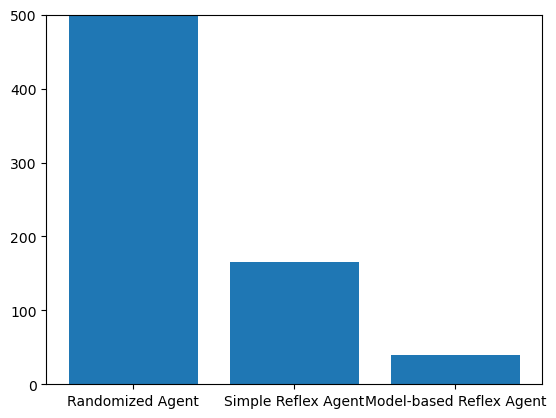

In [104]:
import matplotlib.pyplot as plt
fivebyfivemeans = [avg1, avg4, avg7]
print(f"Mean performance for a 5x5 env: {fivebyfivemeans}")
keys = ['Randomized Agent', 'Simple Reflex Agent', 'Model-based Reflex Agent']
plt.bar(keys,fivebyfivemeans)
plt.ylim(0,500)
plt.show()

Of course, the randomized agent took much longer than 500 steps but for the sake of comparison I set the y limit to 500

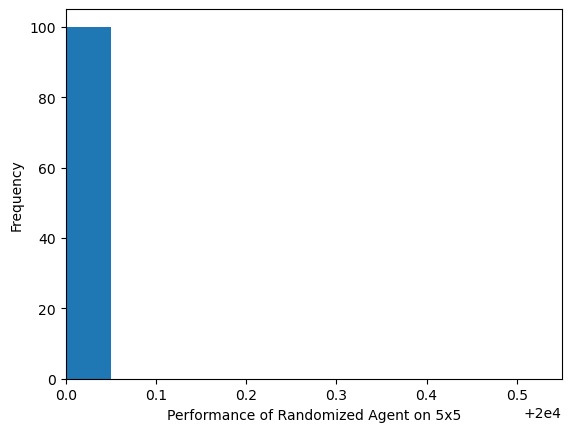

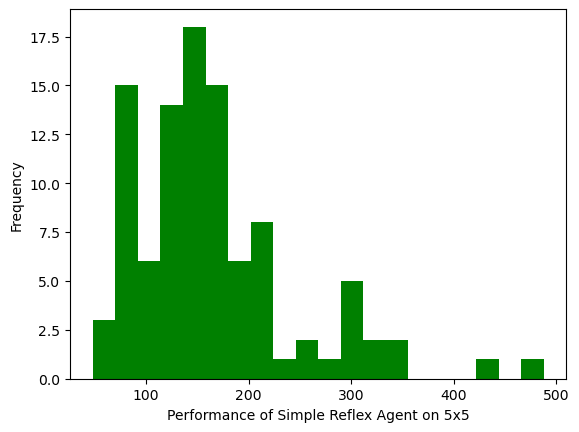

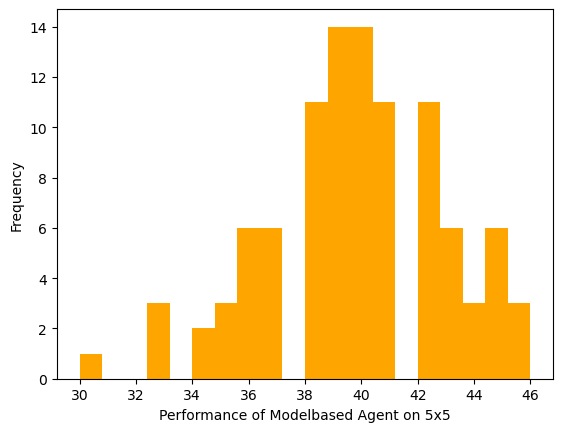

In [129]:
plt.hist(list1, bins=20)
plt.xlabel("Performance of Randomized Agent on 5x5")
plt.ylabel("Frequency")
plt.xlim(20000)
plt.show()

plt.hist(list4, bins=20, color='green')
plt.xlabel("Performance of Simple Reflex Agent on 5x5")
plt.ylabel("Frequency")
plt.show()

plt.hist(list7, bins=20, color='orange')
plt.xlabel("Performance of Modelbased Agent on 5x5")
plt.ylabel("Frequency")
plt.show()

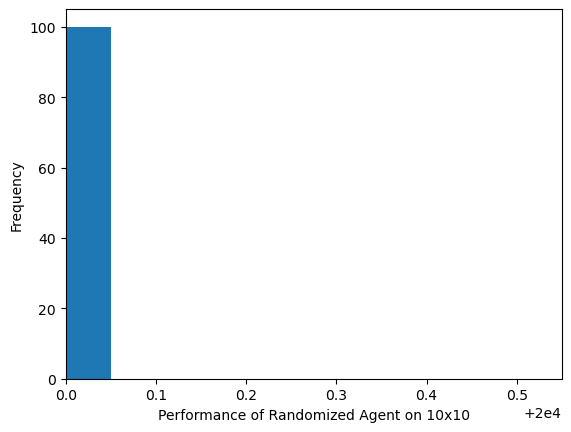

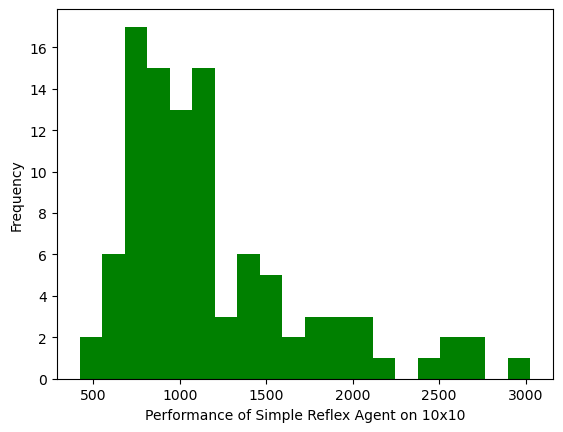

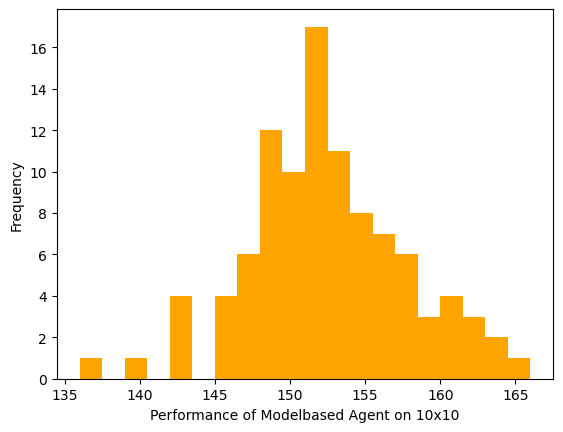

In [130]:
plt.hist(list2, bins=20)
plt.xlabel("Performance of Randomized Agent on 10x10")
plt.xlim(20000)
plt.ylabel("Frequency")
plt.show()

plt.hist(list5, bins=20, color='green')
plt.xlabel("Performance of Simple Reflex Agent on 10x10")
plt.ylabel("Frequency")
plt.show()

plt.hist(list8, bins=20, color='orange')
plt.xlabel("Performance of Modelbased Agent on 10x10")
plt.ylabel("Frequency")
plt.show()

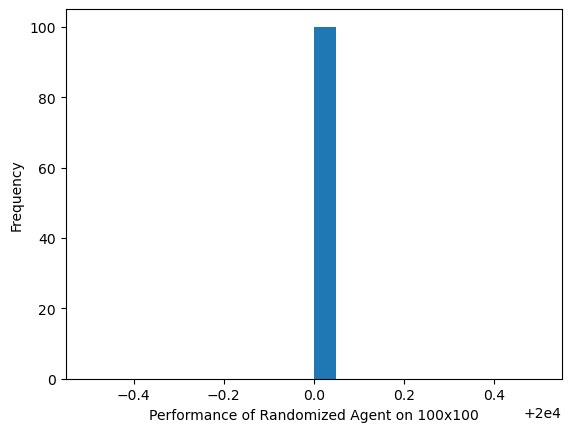

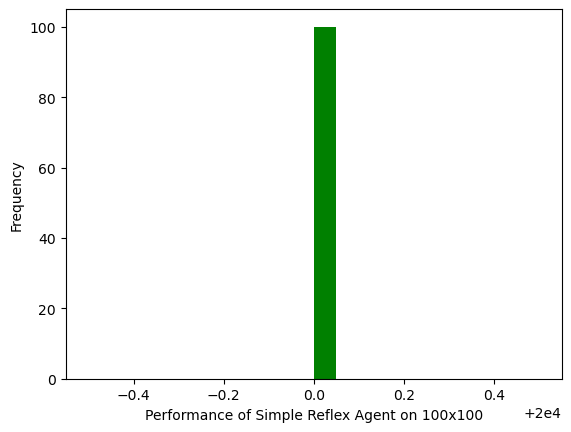

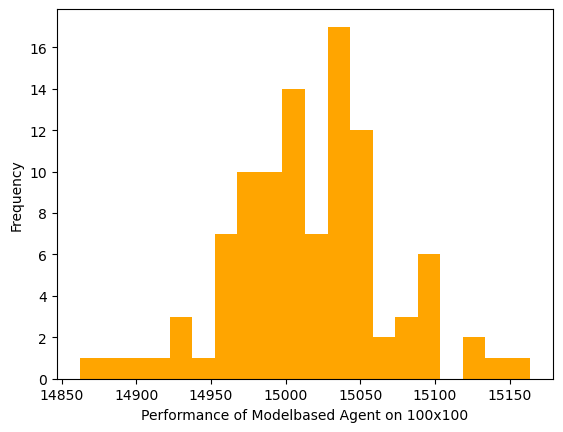

In [131]:
plt.hist(list3, bins=20)
plt.xlabel("Performance of Randomized Agent on 100x100")
plt.ylabel("Frequency")
plt.show()

plt.hist(list6, bins=20, color='green')
plt.xlabel("Performance of Simple Reflex Agent on 100x100")
plt.ylabel("Frequency")
plt.show()

plt.hist(list9, bins=20, color='orange')
plt.xlabel("Performance of Modelbased Agent on 100x100")
plt.ylabel("Frequency")
plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

If my models are put into a rectangular room of unknown size, the randomized and simple reflex models will work similarly as they don't take location into account, and the model-based agent should be able to clean the room just as effectively as if it were a square room. The random and simple reflex models will randomly choose and action, with the simple reflex model sucking dirt if it detects it and and choosing not to go the direction of an activated bumper. The model based agent will find the northwest corner of the room and continue its lawn mower type cleaning route exactly as it did in the square room. If there is an irregular shape such as a hallway, I expect the simple reflex agent and randomized agent to perform better than the model based agent, with the simple reflex agent performing the best. This is because the model based agent would likely not clean the hallway if it is on the east or west walls, and only clean the hallway if it is on a north or south wall. The model based agent basically sweeps the room vertically (north to south, and south to north) and only moves east or west if a north or south bumper is activated. Therefore, the randomized and simple reflex agent will likely clean more of the hallway than the model based agent. The simple reflex agent would perform better than the randomized agent, as it detects dirt and doesn't walk into walls. Finally, if there are obstacles, I also think the random and simple reflex agent will work better than the model based agent. The model based agent would get confused and continue its lawn mower cleaning route assuming the obstacle is a wall. The simple reflex agent would randomly choose an action that doesn't include walking into the obstacle. The randomized agent would possible walk into the obstacle. Therefore, I believe the simple reflex agent will perform the best with obstacles.

## Advanced task: Obstacles

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

In [186]:
import numpy as np
bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
actions=['north', 'east', 'south', 'west']

def obstacleenv(dim, maxsteps, verbose = True):
    
    #initializing random number generator
    rng = np.random.default_rng()
    
    #intializing proportion of cleans and dirty
    p=.5
    
    #generating array with values 'dirty' and 'clean' with frequency p
    space = rng.choice(['dirty', 'clean', 'obst'], size=(dim,dim), p=[.3,.4,.3])
    
    num_cleaned = 0
    
    #I set the origin coordinates for the vacuum to be [2][2]
    #The coordinates could start anywhere and the model agent would still find the correct location
    #x coordinates for the array
    x=2
    #y coordinates for the array
    y=2
    space[x][y]='clean'
    
    #Commented out neatly printing the original space
    print("Initial Space")
    print("=============")
    print(space)
    print()
    agent1 = Agent(bumpers)
    step=0
    #Setting the starting coordinates as clean so the robot doesn't land on an obstacle
    
    for i in range(maxsteps):
            dirty = space[x][y]
            
            #Commenting out the agents that I am not currently using
            #action = simple_randomized_agent(bumpers, dirty)
            #action = reflexagent(bumpers, dirty)
            action = agent1.act(bumpers, dirty)

            if (verbose):
                print("step", step, "- action:", action)

            #First checking if there is any dirt to suck, then sucking that dirt
            if action == 'suck':
                num_cleaned += 1
                space[x][y] = 'clean'
                
            #Then checking if the movement is valid (we don't run over walls)(this doesn't mean we can't bump into walls)
            if action == 'north' and x>=1:
                x-=1
            if action == 'east' and y<=(dim-2):
                y+=1
            if action == 'south' and x<=(dim-2):
                x+=1
            if action == 'west' and y>=1:
                y-=1

            #Coding the environment to trigger the bumpers if on an edge
            if x==0:
                bumpers["north"]=True
            else:
                bumpers["north"]=False
            if x==(dim-1):
                bumpers["south"]=True
            else:
                bumpers["south"]=False
            if y==0:
                bumpers["west"]=True
            else:
                bumpers["west"]=False
            if y==(dim-1):
                bumpers["east"]=True
            else: 
                bumpers["east"]=False
                
            #Setting the bumpers to react to the obstacles 'obst' if the index exists
            if (x+1)<dim:
                if space[x+1][y]=='obst':
                    bumpers["south"]=True
            if (x-1)>=0:
                if space[x-1][y]=='obst':
                    bumpers["north"]=True
            if (y+1)<dim:
                if space[x][y+1]=='obst':
                    bumpers['east']=True
            if (y-1)>=0:
                if space[x][y-1]=='obst':
                    bumpers['west']=True
            
            step+=1
            #If all dirt has been cleaned, return the number of steps it took to make it so
            if 'dirty' not in space:
                return step
        
    #These are simply print statements that I used to neatly display the before/after spaces
    print()
    print("Resulting Space")
    print("===============")
    print(space)
    print()
    print("Final Bumpers")
    print(bumpers)
    print()
    print(step)
    print("Final Coordinates of the robot", x,y)
    
    return step

In [182]:
#Random Agent
obstacleenv(5, 10, verbose = True)

Initial Space
[['obst' 'clean' 'clean' 'dirty' 'dirty']
 ['obst' 'clean' 'clean' 'clean' 'clean']
 ['dirty' 'dirty' 'clean' 'clean' 'obst']
 ['obst' 'obst' 'clean' 'dirty' 'obst']
 ['clean' 'obst' 'dirty' 'obst' 'clean']]

step 0 - action: east
step 1 - action: north
step 2 - action: south
step 3 - action: north
step 4 - action: east
step 5 - action: north
step 6 - action: north
step 7 - action: east
step 8 - action: south
step 9 - action: east

Resulting Space
[['obst' 'clean' 'clean' 'dirty' 'dirty']
 ['obst' 'clean' 'clean' 'clean' 'clean']
 ['dirty' 'dirty' 'clean' 'clean' 'obst']
 ['obst' 'obst' 'clean' 'dirty' 'obst']
 ['clean' 'obst' 'dirty' 'obst' 'clean']]

Final Bumpers
{'north': False, 'south': True, 'west': False, 'east': True}

10
Final Coordinates of the robot 1 4


10

The randomized agent doesn't react to the bumpers and consequently doesn't avoid obstacles. It runs right into obstacles which is rather unrealistic as well as inefficient. If we want an agent to react to the obstacles and not try to go run into them, we need at least a reflexive agent. The bumpers are activated, as the southern bumper is activated from an obstacle. The agent simply just doesn't take the bumpers into account when choosing an action.

In [185]:
#Simple Reflex Agent
obstacleenv(5, 10, verbose = True)

Initial Space
[['obst' 'dirty' 'obst' 'dirty' 'clean']
 ['clean' 'clean' 'clean' 'obst' 'obst']
 ['dirty' 'dirty' 'clean' 'dirty' 'obst']
 ['obst' 'dirty' 'clean' 'obst' 'obst']
 ['clean' 'clean' 'dirty' 'dirty' 'clean']]

step 0 - action: north
step 1 - action: west
step 2 - action: south
step 3 - action: suck
step 4 - action: north
step 5 - action: south
step 6 - action: south
step 7 - action: suck
step 8 - action: south
step 9 - action: west

Resulting Space
[['obst' 'dirty' 'obst' 'dirty' 'clean']
 ['clean' 'clean' 'clean' 'obst' 'obst']
 ['dirty' 'clean' 'clean' 'dirty' 'obst']
 ['obst' 'clean' 'clean' 'obst' 'obst']
 ['clean' 'clean' 'dirty' 'dirty' 'clean']]

Final Bumpers
{'north': True, 'south': True, 'west': True, 'east': False}

10
Final Coordinates of the robot 4 0


10

The agent's programming is working as expected. The agent reacts to the obstacles by initiating its bumpers and chooses an aciton that doesn't run into the obstacles. If there is dirt, the agent detects it and sucks it. The bumpers are working as well, as the south bumper is reacting to the obstacle directly below it.

In [187]:
obstacleenv(5, 10, verbose = True)

Initial Space
[['clean' 'obst' 'obst' 'dirty' 'clean']
 ['clean' 'dirty' 'clean' 'clean' 'dirty']
 ['obst' 'dirty' 'clean' 'clean' 'clean']
 ['obst' 'clean' 'obst' 'clean' 'clean']
 ['obst' 'clean' 'clean' 'dirty' 'obst']]

step 0 - action: north
step 1 - action: west
step 2 - action: suck
step 3 - action: west
step 4 - action: north
step 5 - action: south
step 6 - action: east
step 7 - action: south
step 8 - action: suck
step 9 - action: south

Resulting Space
[['clean' 'obst' 'obst' 'dirty' 'clean']
 ['clean' 'clean' 'clean' 'clean' 'dirty']
 ['obst' 'clean' 'clean' 'clean' 'clean']
 ['obst' 'clean' 'obst' 'clean' 'clean']
 ['obst' 'clean' 'clean' 'dirty' 'obst']]

Final Bumpers
{'north': False, 'south': False, 'west': True, 'east': True}

10
Final Coordinates of the robot 3 1


10

While this agent correctly reacts to the obstacles that trigger its bumpers by not running into obstacles, the hardcoded lawn-mower algorithm doesn't seem to work with this. The lawn mower algorithm and location discovery that are coded into the agent are messed up by the obstacles, as the agent uses its bumpers to determine its location. For example, when detecting a south bumper being triggered by an obstacle, it assumes it is in the southwest corner even though it is not. This happened in step 5, as for step 6 it chose to go east rather than continue its route south. 

Given the behavior of these agents with the obstacle environment, the simple reflex agent seems to work the best, as it reacts to the obstacles by not running into them, detects if there's dirt to suck, and doesn't get messed up by a hardcoded pathfinding algorithm like the model based agent.

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code